# <div dir=rtl> תרגול שלישי - Pandas </div>


## <div dir=rtl> שאלה 1 </div>
<div dir=rtl>
    בשנת 2017 פרסם משרד הבריאות הברזילאי מידע על אודות תורים לרופא - מידע על המטופלים והאם הם הגיעו למרפאה - במטרה לשפר את שיעור ההתייצבות לתור. המידע שמור בקובץ 3.appointments.csv. <br /><br />
</div>
<div dir=rtl style='background-color: #fcf2f2;'> 
    הערה: הדאטאסט אמיתי וניתן להורדה בצורה חופשייה. הנתונים בו שונו לצורך הדוגמה. <br />
</div>
https://www.kaggle.com/datasets/joniarroba/noshowappointments
<div dir=rtl>
    <br />
    א. טענו את הקובץ לאובייקט מסוג DataFrame. כמה רשומות קיימות?
</div>

In [70]:
import pandas as pd
dataset = pd.read_csv('appointments_3.csv')
# NOTE this file has a good list of titles as its first line; 
#       sometimes it's missing and/or on the other hand first few lines are irrelevant
# TODO try to skip first line and give column names manually instead (see doc for read_csv args)
dataset.shape

(95317, 14)

In [71]:
dataset.head(4)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<div dir=rtl>
    טענו קובץ מסוג CSV. נבדוק מה סוג הנתונים בכל אחת מהעמודות:
</div>

In [72]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95317 entries, 0 to 95316
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientId       95317 non-null  float64
 1   AppointmentID   95317 non-null  int64  
 2   Gender          95317 non-null  object 
 3   ScheduledDay    95317 non-null  object 
 4   AppointmentDay  95317 non-null  object 
 5   Age             95317 non-null  int64  
 6   Neighbourhood   95317 non-null  object 
 7   Scholarship     95317 non-null  int64  
 8   Hypertension    95317 non-null  int64  
 9   Diabetes        95317 non-null  int64  
 10  Alcoholism      95317 non-null  int64  
 11  Handcap         95317 non-null  int64  
 12  SMS_received    95317 non-null  int64  
 13  No-show         95317 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 10.2+ MB


<div dir=rtl>
    כלומר קיבלנו שמידע קטגוריאלי (הגיע לתור או לא) נשמר כטקסט וגם מידע קטגוריאלי אחר (סכרת, יתר לחץ דם) נשמר כאינטג'ר. 
</div>

In [73]:
dataset['PatientId'] = dataset['PatientId'].apply(int)
# NOTE apply() accepts a callable (function pointer) to be applied at each cell
dataset['Gender'] = dataset['Gender'].astype('category')

bool_fields = ['Scholarship','Hypertension','Diabetes','Alcoholism','Handcap','SMS_received']
dataset[bool_fields] = dataset[bool_fields].astype('bool')

time_fields = ['AppointmentDay','ScheduledDay']
dataset[time_fields] = dataset[time_fields].apply(pd.to_datetime)

dataset.set_index('PatientId', inplace=True)  
# NOTE inplace vs. returning modified copy. Think when is better to use each..

In [74]:
dataset.head(4)

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
PatientId,,,,,,,,,,,,,
29872500000000,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,False,False,No
558998000000000,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,False,False,No
4262960000000,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,False,False,No
8841190000000,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,False,False,No


In [75]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95317 entries, 29872500000000 to 377512000000000
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   AppointmentID   95317 non-null  int64              
 1   Gender          95317 non-null  category           
 2   ScheduledDay    95317 non-null  datetime64[ns, UTC]
 3   AppointmentDay  95317 non-null  datetime64[ns, UTC]
 4   Age             95317 non-null  int64              
 5   Neighbourhood   95317 non-null  object             
 6   Scholarship     95317 non-null  bool               
 7   Hypertension    95317 non-null  bool               
 8   Diabetes        95317 non-null  bool               
 9   Alcoholism      95317 non-null  bool               
 10  Handcap         95317 non-null  bool               
 11  SMS_received    95317 non-null  bool               
 12  No-show         95317 non-null  object             
dtypes: bool(6), c

<div dir=rtl>
    ב. תארו את המשתתפים במחקר מבחינת גיל, מין ואזור מגורים (שכונה)
</div>

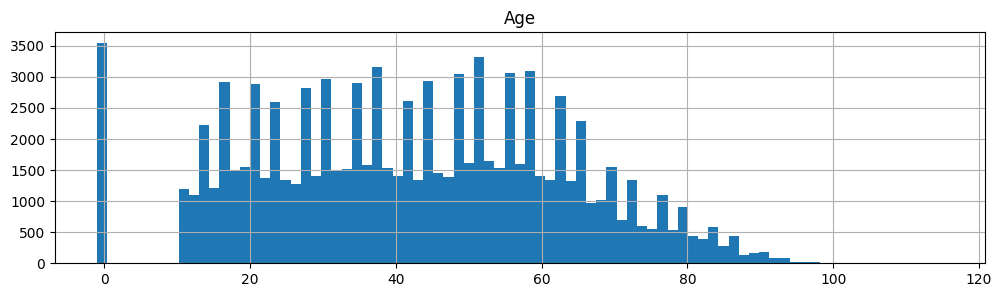

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 3))

hist = dataset.hist(
    column='Age',
    bins='auto', # range(0, 100, 2), 
    figsize=(15,10), ax=plt.gca()
)
# TODO why spikey, can it be smoothed by choice of bins?
# NOTE pandas-numpy-matplotlib integration: pandas DataFrame method organizes the DF data as numpy arrays,
#      to be send to matplotlib funcs. Objects created are matplotlib graphical objects)
# TODO run the below
#plt.xlabel('age')                      # implicitly addressing current axes
#ax=plt.gca(); ax.set_ylabel('counts')  # explicitly getting and addressing current axes


In [9]:
dataset[['Age']].describe()

,Age
count,95317.000000
mean,42.185948
std,20.715495
min,-1.000000
25%,26.000000
50%,42.000000
75%,58.000000
max,115.000000


In [10]:
dataset['Age'].sort_values().unique()
# TODO how to get counts of each to print? how to visualize counts per age with simple line plot w.o. histogram?

array([ -1,   0,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,
        22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,
        35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,
        48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,
        61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,
        74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,
        87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
       100, 102, 115], dtype=int64)

<div dir=rtl>
    שמנו לב שחלק המערכים בעמודת הגיל לא תקינים, לדוגמה גיל שלילי או גיל שווה ל-0. <br />
    חשוב! לא תמיד כדאי לסמוך על כך ש״הדאטה בסדר״, במידה ויש ידע קודם לגביי ערכים אפשריים בעמודה, וודאו זאת
</div>

In [11]:
dataset = dataset[dataset.Age > 0]

In [12]:
dataset[['Age']].describe()

,Age
count,91777.000000
mean,43.813145
std,19.349171
min,11.000000
25%,28.000000
50%,43.000000
75%,58.000000
max,115.000000


C:\Users\alexf\AppData\Local\Temp\ipykernel_29068\2913292683.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hist_by_gender = dataset.hist(
C:\Users\alexf\AppData\Local\Temp\ipykernel_29068\2913292683.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  hist_by_gender = dataset.hist(


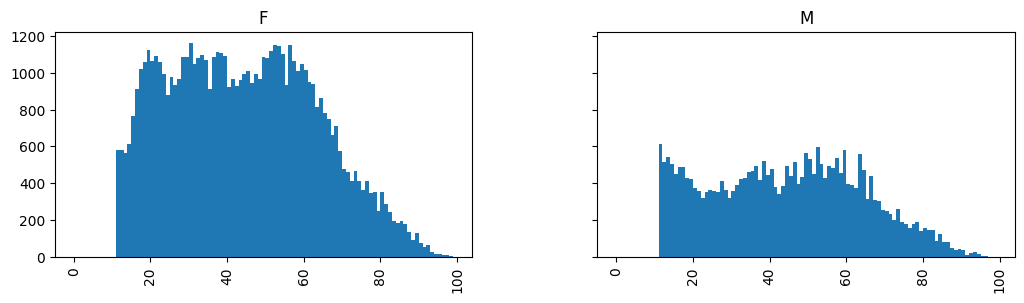

In [13]:
plt.figure(figsize=(12, 3))

hist_by_gender = dataset.hist(
    column='Age',
    by='Gender',
    bins=range(100), #'auto', 
    figsize=(15,8),
    sharex=True,
    sharey=True,
    ax=plt.gca()
)
# TODO: run the below
# plt.gca().grid();  what's missing? how to fix? hint: run the below
# type(hist_by_gender), [type(hh) for hh in hist_by_gender]
# TODO: look for hist() doc. where? method of which class? run type(dataset)

In [14]:
#dataset['Gender'].value_counts()
# NOTE equivalent syntax for a single column
dataset.Gender.value_counts()  

# TODO run the below, why useful, how it works
# dataset[['Age', 'Gender']].value_counts().sort_index().head(10)
# dataset[['Age', 'Gender']].value_counts().sort_values(ascending=False).head(10)

Gender
F    62975
M    28802
Name: count, dtype: int64

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html

<Axes: ylabel='count'>

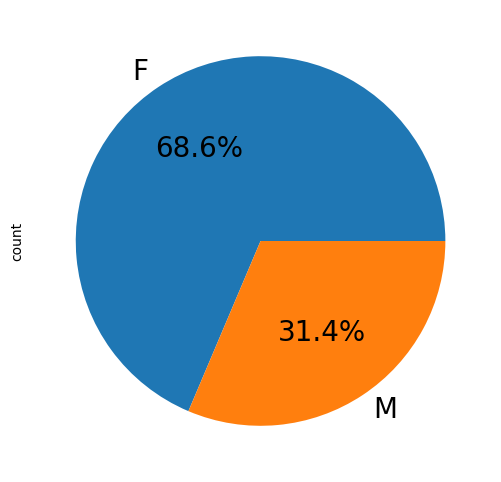

In [15]:
plt.figure(figsize=(2, 2))

dataset['Gender'].value_counts().plot.pie(
    figsize=(6,6),
    fontsize=20,
    autopct='%.1f%%',
    ax=plt.gca()
)
# TODO: WTF can't change fig size here? (teach me)

<div dir=rtl>
    כעת אנחנו רוצים לספור כמה משתתפים במחקר מכל אזור מגורים. נאיבית - היינו רצים על כל השכונות בלולאה.<br />
    זה בזבוז משאבים - פנדס מממש עבורינו את המתודה groupby בצורה יעילה במיוחד. <br />
    המתודה מחזירה אובייקט אשר מחיל פונקציה על כל קבוצה בנפרד.
</div>

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

In [16]:
neigh_total_data = pd.DataFrame(
    dataset.groupby('Neighbourhood').size(),
    columns=['# Participants']
)

neigh_total_data

,# Participants
Neighbourhood,
AEROPORTO,8
ANDORINHAS,1919
ANTÔNIO HONÓRIO,224
ARIOVALDO FAVALESSA,224
BARRO VERMELHO,397
...,...
SÃO JOSÉ,1516
SÃO PEDRO,1984
TABUAZEIRO,2498


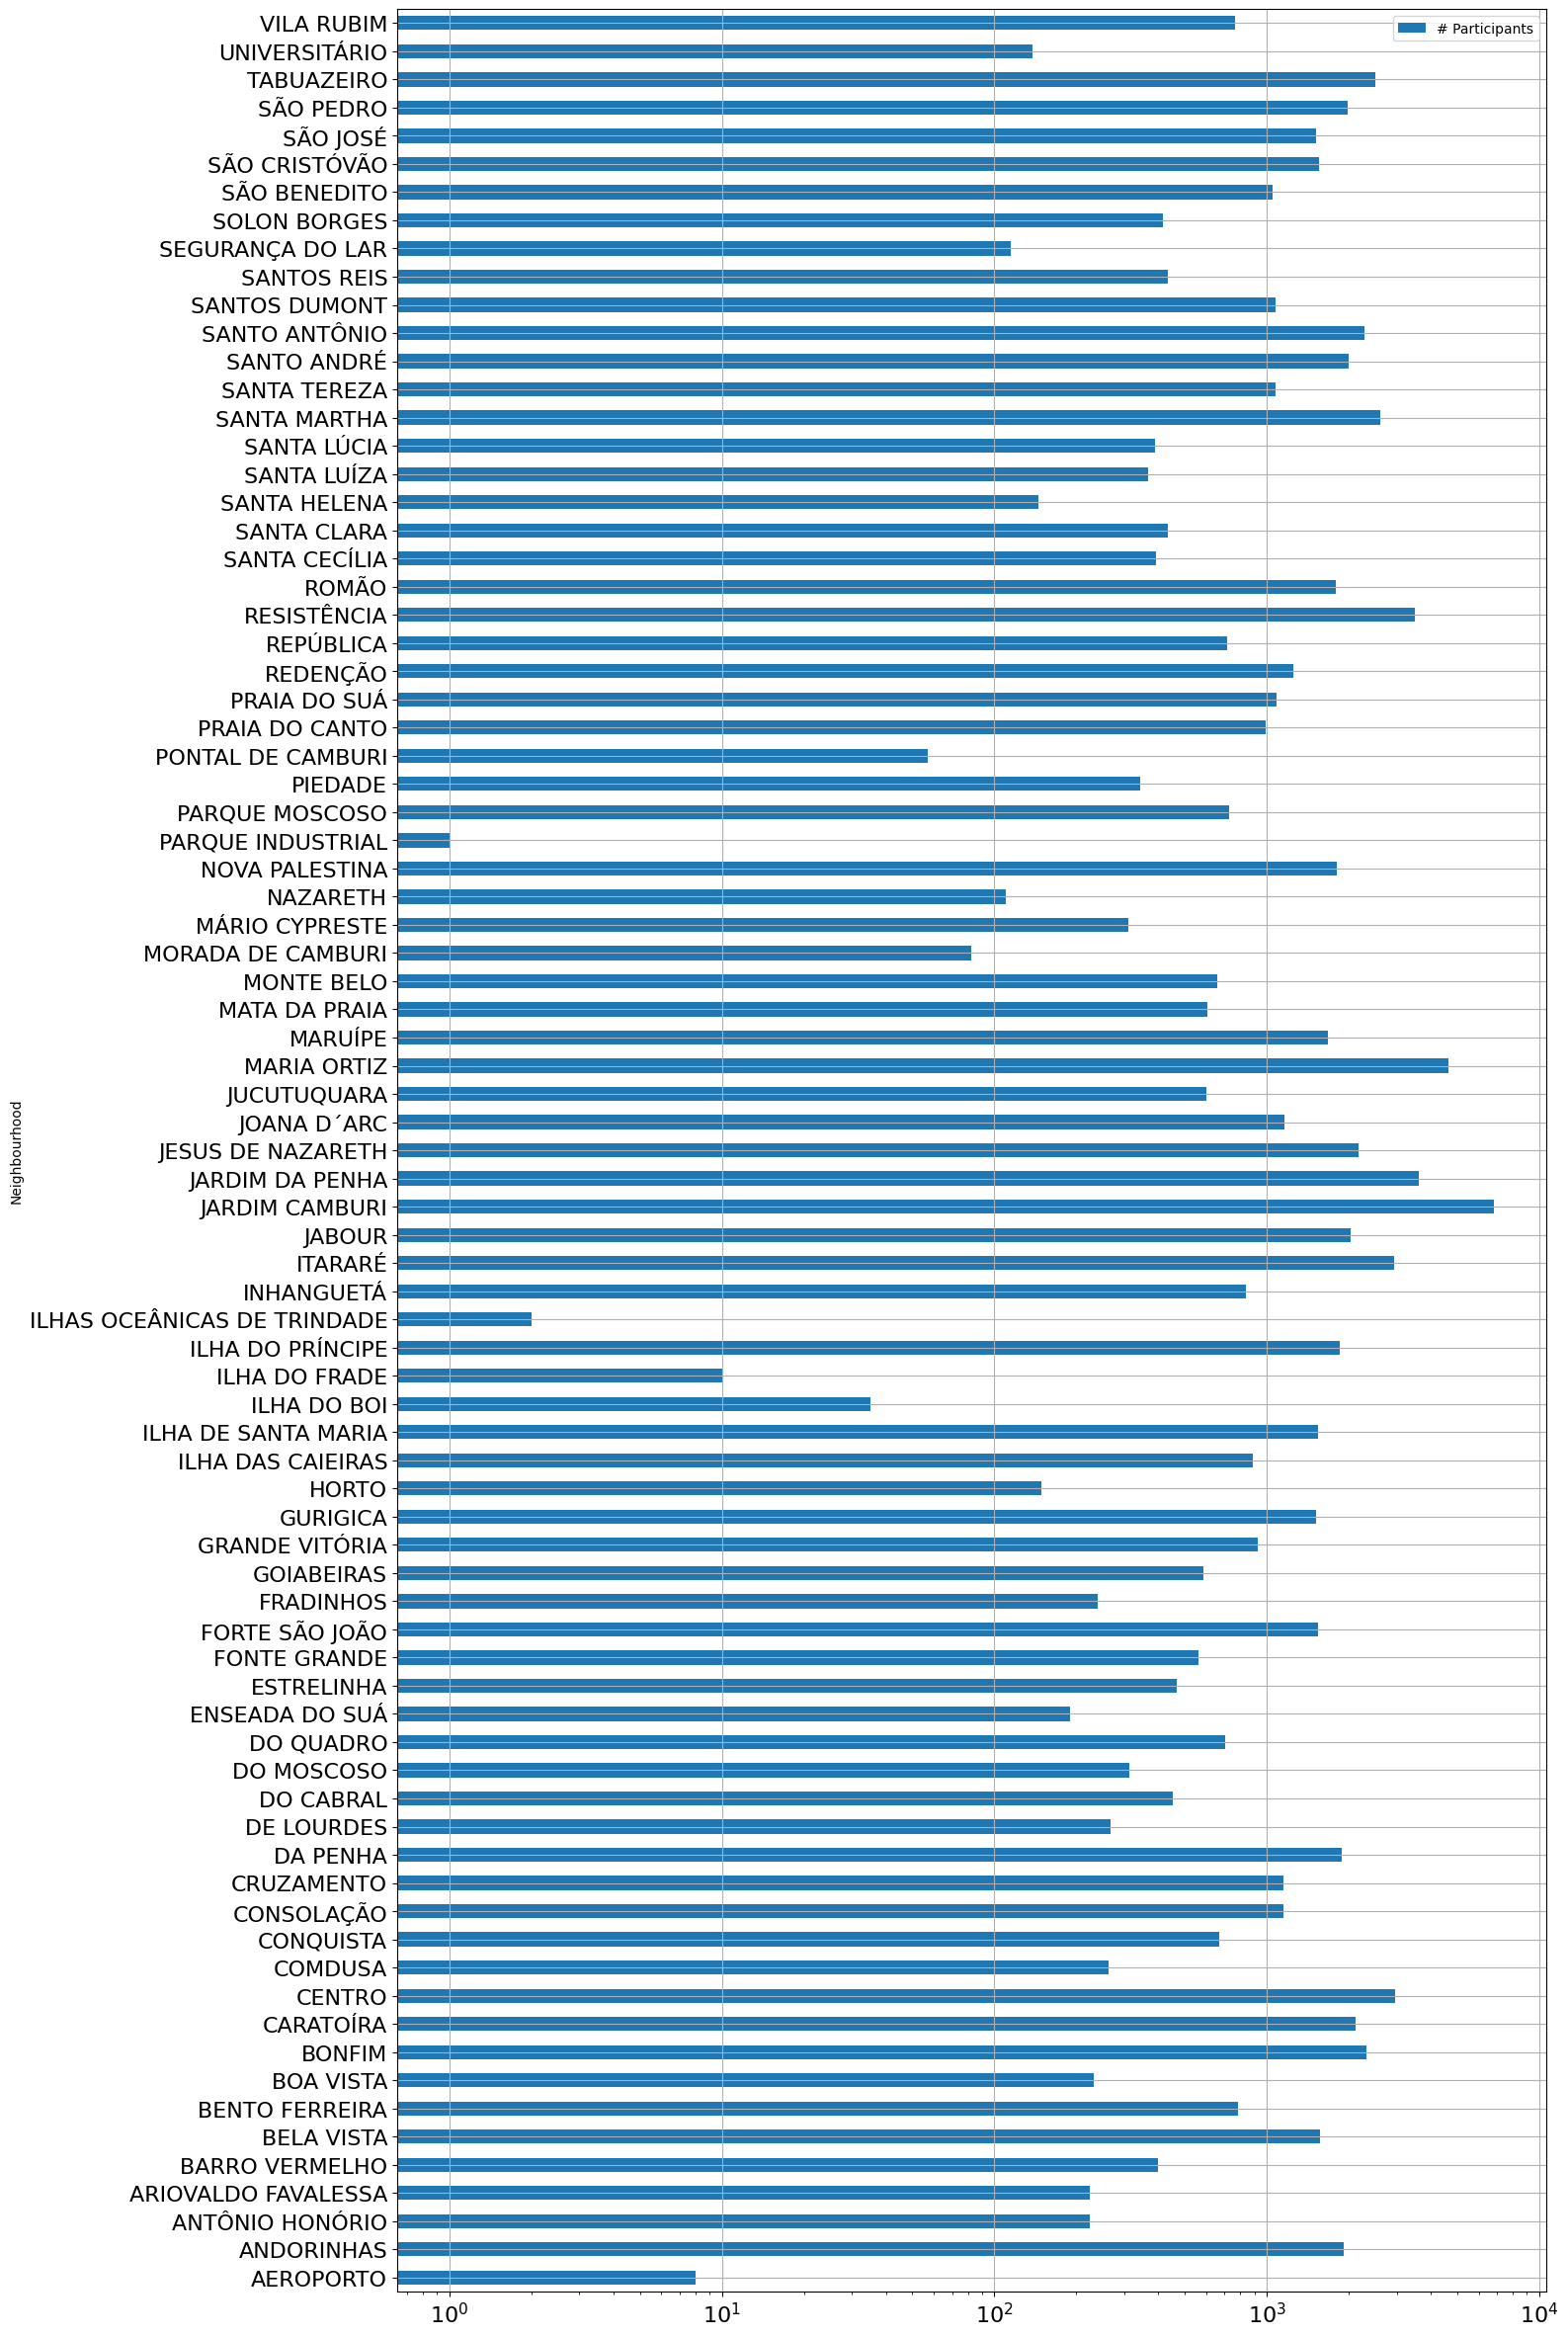

In [17]:
plot = neigh_total_data.plot(figsize=(15,30),
                       kind='barh',
                       logx=True,
                       fontsize=16,
                       grid=True,
                       rot=0
                      )
# TODO do you like this visualization? what could be improved?

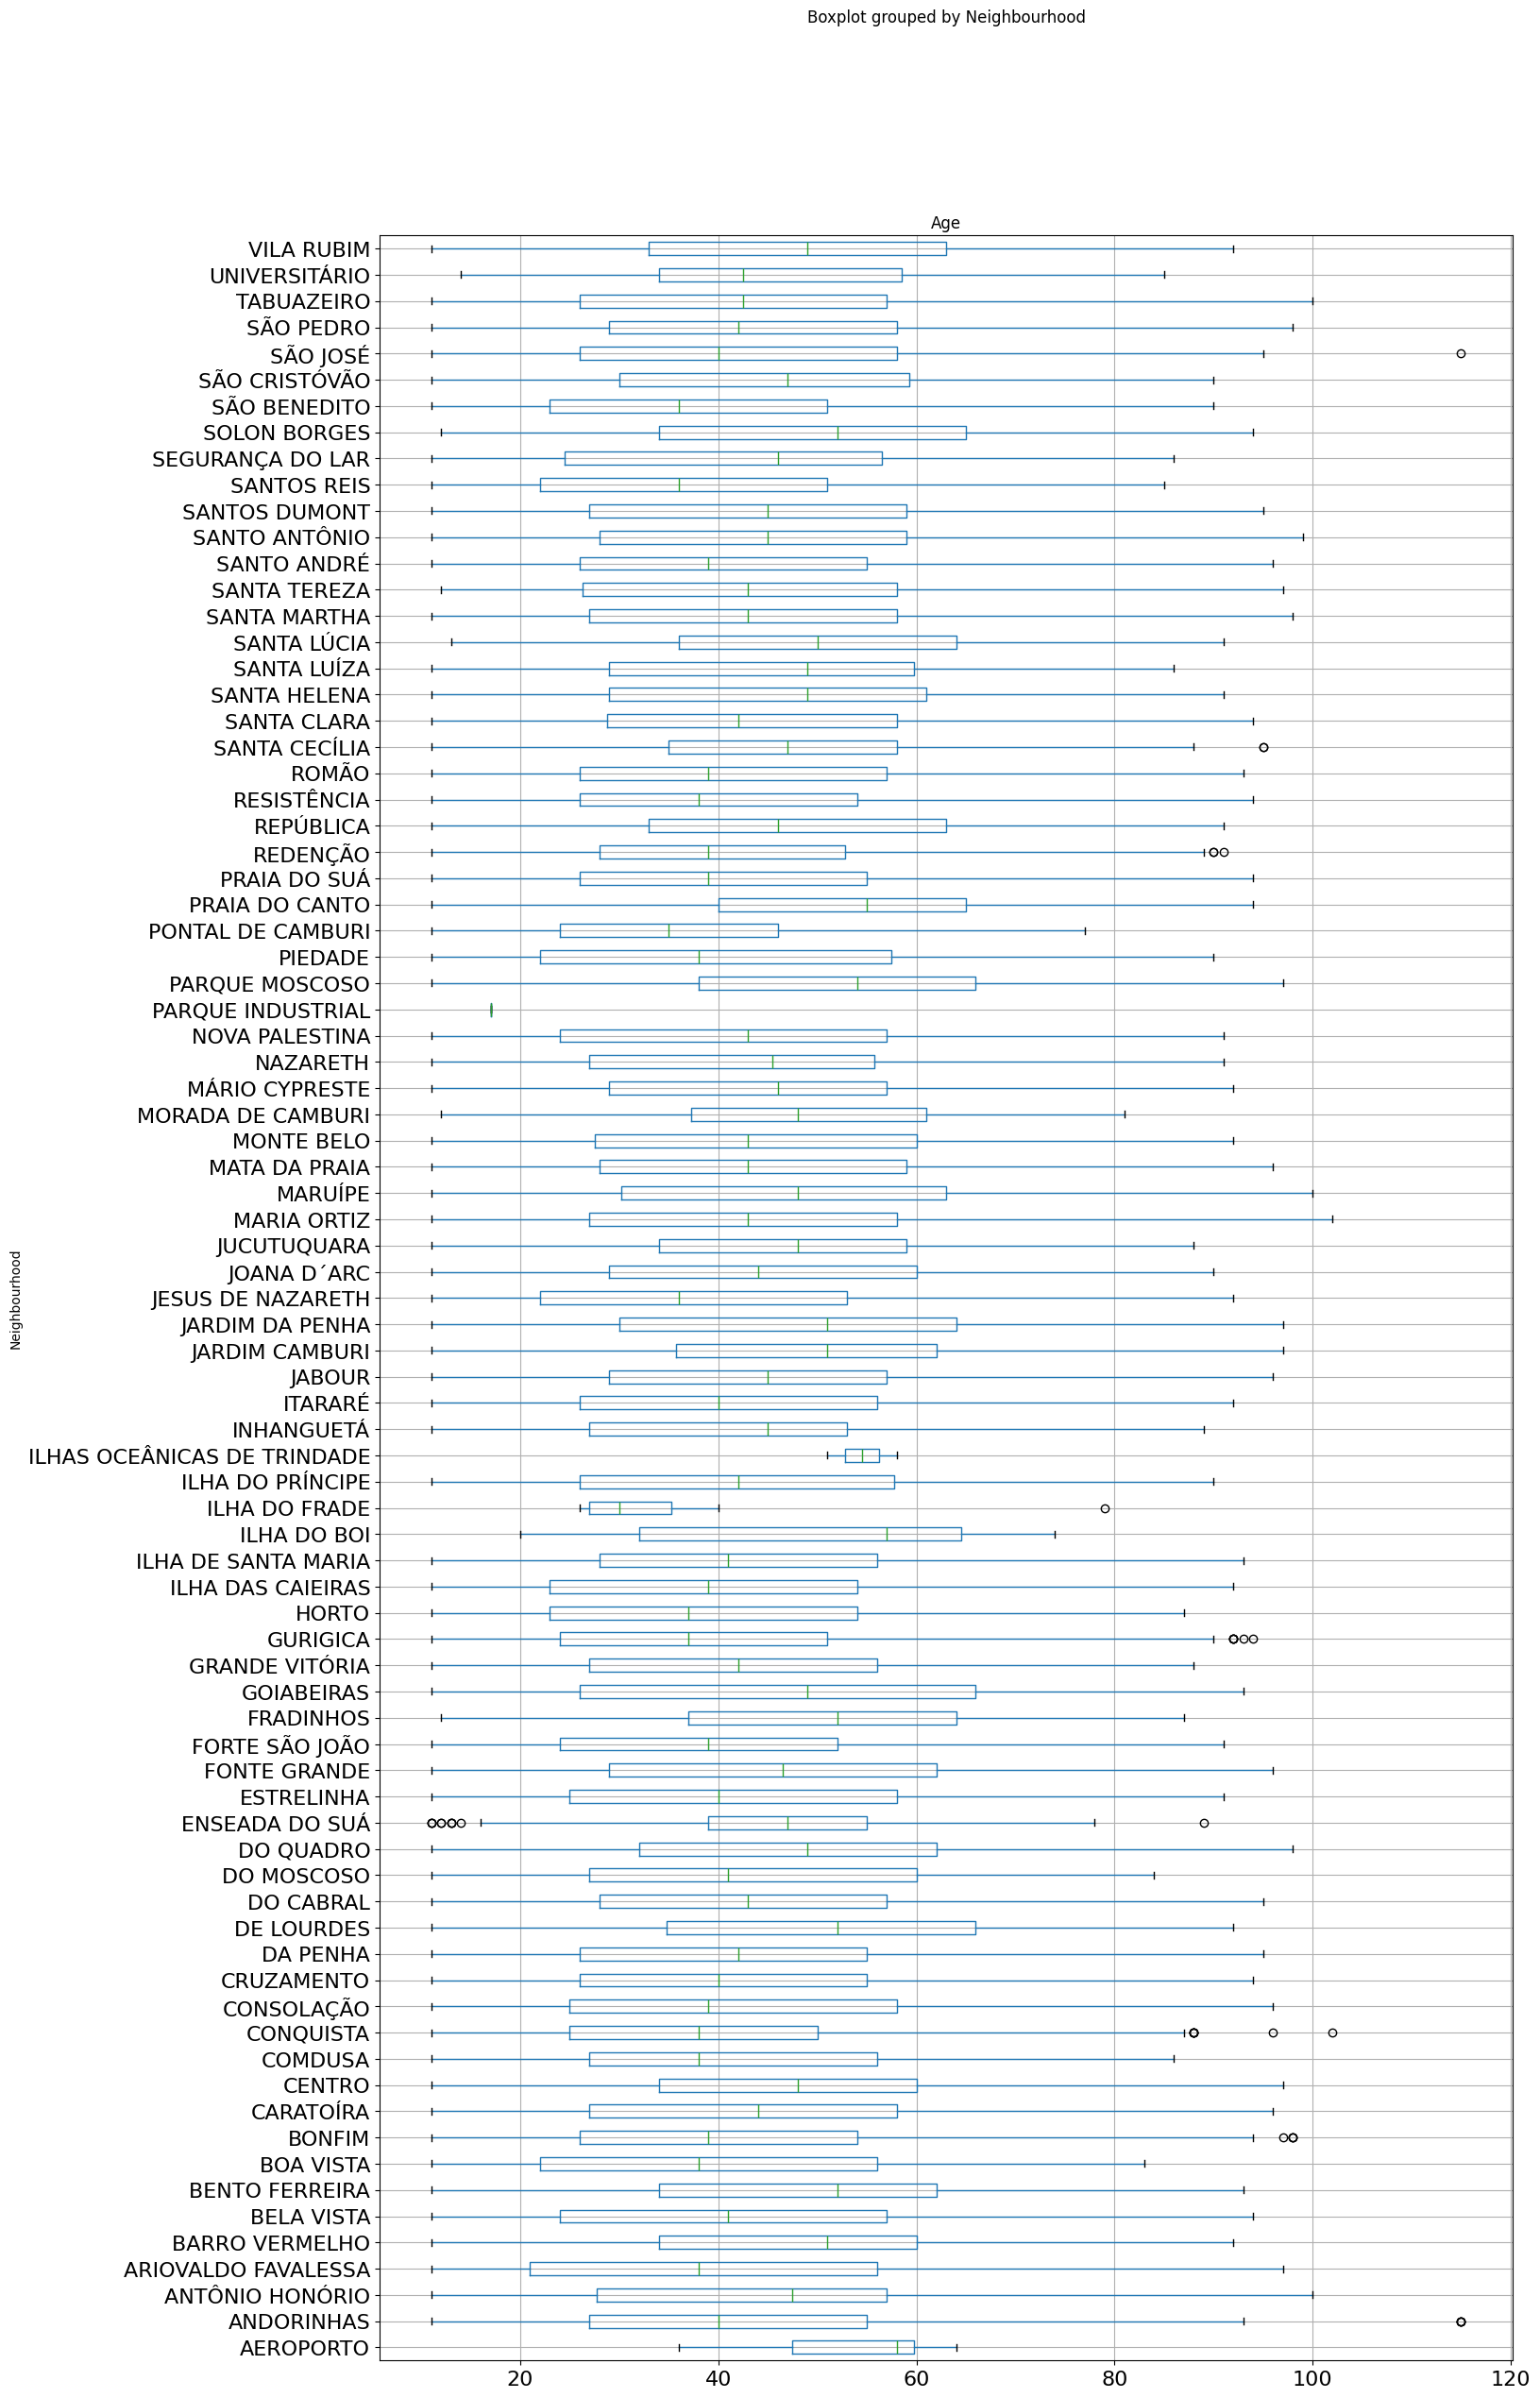

In [18]:
neigh_by_age = dataset.boxplot(
    column='Age',
    by='Neighbourhood',
    vert=False,
    figsize=(15,30),
    fontsize=16
)

In [19]:
#dataset[dataset['Neighbourhood']=='PARQUE INDUSTRIAL']
dataset[ (dataset['Neighbourhood']=='AEROPORTO') & (dataset['Gender']=='F') ]
# TODO try other filtering logics (OR, NOT)
# TODO how to filter on appointment time in certain range?

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
PatientId,,,,,,,,,,,,,
95987200000000,5595387,F,2016-04-18 12:36:04+00:00,2016-05-05 00:00:00+00:00,37,AEROPORTO,False,False,False,False,False,False,Yes
52675700000000,5647604,F,2016-05-02 14:01:33+00:00,2016-05-09 00:00:00+00:00,58,AEROPORTO,False,False,False,False,False,False,No
52675700000000,5681949,F,2016-05-10 15:27:23+00:00,2016-05-12 00:00:00+00:00,58,AEROPORTO,False,False,False,False,False,False,No
7235690000000,5427853,F,2016-03-03 15:17:12+00:00,2016-05-17 00:00:00+00:00,64,AEROPORTO,False,True,False,False,False,False,No
9816960000000,5768785,F,2016-06-03 08:01:28+00:00,2016-06-03 00:00:00+00:00,36,AEROPORTO,False,False,False,False,False,False,No


סיפור רקע:

 groupby, aggregate, MultiIndex

In [41]:
import numpy as np
# TODO analyze this call, understand the statistical aggregation function & syntax
mega_agg = dataset.groupby(['Gender','No-show'], observed=False) \
                  .aggregate({'Age': ['mean', 'std'], 
                              'Alcoholism': [lambda x: 100*np.mean(x), np.sum, np.size]
                              })
# display(mydf)  # TODO uncomment to see pre-rename
# NOTE table has a Multi-Index on both Index ("rows") and columns. 
#      read a bit about pandas MultiIndex, it might get messy fast,
#      but we should have some basic understanding, even for trivial columns rename:
arrays = [['Age', 'Age', 'Alcoholism', 'Alcoholism', 'Alcoholism'], 
          ['mean','std', '% pos.',     '# pos.',     '#total']]
mega_agg.columns = pd.MultiIndex.from_arrays(arrays, names=('','')) # , 'stat.agg.'))
mega_agg


C:\Users\alexf\AppData\Local\Temp\ipykernel_29068\3883110115.py:4: FutureWarning: The provided callable <function sum at 0x00000130CF823600> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  .aggregate({'Age': ['mean', 'std'],


Age            Alcoholism              
                     mean        std     % pos. # pos. #total
Gender No-show                                               
F      No       44.614987  19.082845   1.822096    914  50162
       Yes      40.576758  18.705675   2.403809    308  12813
M      No       44.813161  19.890258   7.645989   1765  23084
       Yes      39.993879  19.641838   6.435817    368   5718

<div dir=rtl>
    ג. האם יותר סביר שנשים או גברים לא יתייצבו לתור?<br />
</div>

In [48]:
no_show_by_gender = pd.DataFrame(
    dataset.groupby(['Gender','No-show']).size(),
    # columns=['Counts']
)
# NOTE diff between print() and display() (jupyter smart pretty-print)
#      jupyter always sends the result of last line of cell to display(), implicitly
# display(no_show_by_gender)
print(no_show_by_gender)

# TODO read groupby doc
# dataset.groupby?

                    0
Gender No-show       
F      No       50162
       Yes      12813
M      No       23084
       Yes       5718


C:\Users\alexf\AppData\Local\Temp\ipykernel_29068\1749616306.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataset.groupby(['Gender','No-show']).size(),


In [52]:
no_show_by_gender

0
Gender No-show       
F      No       50162
       Yes      12813
M      No       23084
       Yes       5718

In [57]:
# We'd like to see percentiges...
100 * no_show_by_gender / no_show_by_gender.sum()
# Is it a correct normalization?  Does it help us test the hypothesis?

0
Gender No-show           
F      No       54.656395
       Yes      13.961014
M      No       25.152271
       Yes       6.230319

In [55]:
# NOTE: Partial reduce of MultiIndex done through "groupby" semantics
#       (reduce-sum within group, not across the whole column)

total_by_gender = no_show_by_gender.groupby('Gender').sum()
no_show_by_gender_p = 100 * no_show_by_gender / total_by_gender    
no_show_by_gender_p.columns = ['%']
no_show_by_gender_p.round(decimals=2)

C:\Users\alexf\AppData\Local\Temp\ipykernel_29068\38070463.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_by_gender = no_show_by_gender.groupby('Gender').sum()


%
Gender No-show       
F      No       79.65
       Yes      20.35
M      No       80.15
       Yes      19.85

<div dir=rtl>
    ד. באותה שנה משרד הבריאות הברזילאי ערך ניסוי - הוא שלח הודעות באקראי יום לפני המועד שנקבע לרופא. לצערם,
    הדאטא-סיינטיסטית שלהם פרשה לפנסיה מוקדמת.  עזרו למשרד הבריאות -
    האם משלוח הודעה מגדיל את הסיכויים של המטופל להתייצב? האם זה מובהק?
</div>

In [63]:
df = pd.DataFrame(
    dataset.groupby(['SMS_received', 'No-show']).size(),
    columns=['#']
)
df['%'] = (100 * df['#'] /  df['#'].groupby('SMS_received').sum()).round(2)
df

#      %
SMS_received No-show              
0            No       62510  83.30
             Yes      12535  16.70
1            No       25698  72.43
             Yes       9784  27.57

ואללה מה קורה פה, האם ייתכן ששליחת ההודעה *מגדילה* את הסיכוי שהמטופל יבריז?

ייתכן שנפלה הטייה במידע ו\או בניסוי ו\או בפרשנות שלו?

In [163]:
# Let's filter out only appointments that were set up long time in advance:

dataset['lead_time'] = dataset.AppointmentDay - dataset.ScheduledDay
dataset_week_or_more = dataset[dataset['lead_time'] > pd.Timedelta(1, 'W')]

df = pd.DataFrame(
    dataset_week_or_more.groupby(['SMS_received', 'No-show']).size(),
    columns=['#']
)
df['% observed'] = (100 * df['#'] /  df['#'].groupby('SMS_received').sum()).round(2)
df

# NOTE: looks better but is it OK to stop here?
# TODO prove that there was bias in the data previously 
#      (SMS not sent or less sent to short-time appointments)
# TODO investigate how to clean the bias? is 1 week a good number or we nned less / more?     

#  % observed
SMS_received No-show                   
False        No        8851       64.90
             Yes       4786       35.10
True         No       14672       70.97
             Yes       6002       29.03

<div dir=rtl>
    עד עכשיו חישבנו את מה שראינו בדאטה - ה-observed. <br />
    בכדי להבין האם שליחת SMS מעלה את הסיכוי של המטופל להגיע לפגישה נצטרך להשתמש במבחן סטטיסטי. <br />
    המבחן שבו נשתמש הוא מבחן חי-בריבוע, מבחן הבודק אי תלות בין משתנים. <br />
    לשם כך נחשב את האחוזים בכל אופציה בטבלה שהיו מתקבלים אם לא הייתה תלות בין קבלת הודעה והגעה לתור ה- expected.
</div>

In [164]:
# !! H0: The SMS has no effect on the No-show probability
# let's calculate the percentages from total (w.o. regard to SMS)
# 
total_no_show_perc = (100 * df['#'].groupby('No-show').sum() / df['#'].sum()).round(2)
display(total_no_show_perc)

df['% expected (H0)'] = pd.concat((total_no_show_perc,)*2).values

# Alternative: use numbers from w.o. SMS as the "expected" for the "with SMS"
# TODO what's the more correct one?
# df['% expected (H0)'] = np.concatenate((df.loc[False]['% observed'].values, )*2)

df['# expected (H0)'] = (df['% expected (H0)'] / 100 * df['#'].groupby('SMS_received').sum()).round(0)
df.rename(columns={'#': '# observed'}, inplace=True)
df

No-show
No     68.56
Yes    31.44
Name: #, dtype: float64

# observed  % observed  % expected (H0)  # expected (H0)
SMS_received No-show                                                          
False        No             8851       64.90            68.56           9350.0
             Yes            4786       35.10            31.44           4287.0
True         No            14672       70.97            68.56          14174.0
             Yes            6002       29.03            31.44           6500.0

In [172]:
import scipy 

#_df = df[df['SMS_received']==True] # TODO why doesn't it work? NOTE diff index vs. normal column
_df = df.loc[True, :] 
_df = df          # TODO what's right? comparing both/one to expected? gotta set degree of freedom?
# _df = _df / 15  # TODO rerun with this, how the p-value changes? why 
display(_df)
chisq, pv = scipy.stats.chisquare(_df['# observed'], f_exp=_df['# expected (H0)'])
pv

# observed  % observed  % expected (H0)  # expected (H0)
SMS_received No-show                                                          
False        No             8851       64.90            68.56           9350.0
             Yes            4786       35.10            31.44           4287.0
True         No            14672       70.97            68.56          14174.0
             Yes            6002       29.03            31.44           6500.0

3.152468345252184e-30

Another approach, ask pandas for the *contingency table* directly:

In [151]:
contingency_table = pd.crosstab(dataset_week_or_more['SMS_received'], 
                                dataset_week_or_more['No-show'])
print(contingency_table)
# TODO rerun with the below, how the p-value changes? why?
# contingency_table = contingency_table / 34
scipy.stats.chi2_contingency(contingency_table)

No-show          No   Yes
SMS_received             
False          8851  4786
True          14672  6002


Chi2ContingencyResult(statistic=139.89373504946207, pvalue=2.8083516849535113e-32, dof=1, expected_freq=array([[ 9349.28014339,  4287.71985661],
       [14173.71985661,  6500.28014339]]))

```
 NOTE 1 : Statistics is tricky. Study deeply what's the right test to apply.
 
 NOTE 2 : With large datasets it's super easy to get a low p-value and "reject the null hypothesis".
          Question is, does it prove the desired hypothesis?  
          perhaps its another effect, or bias in the data...
```
           